## Principal Component Analysis(PCA):
PCA is a way to summarize many stats into a few new stats called Principal Components (PCs)

PCA takes many features from datasets and turns them into fewer new features that still keep most of the important information

What PCA actually do?


PCA reduces many features into fewer important onesit finds the directions where the data changes the most and creates new features along those directions then it keeps only the most useful and removes the less important this makes the data simpler smaller and easier for machine learning to understand

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [ ]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(569, 30)

In [ ]:
x_pca.shape

(569, 2)

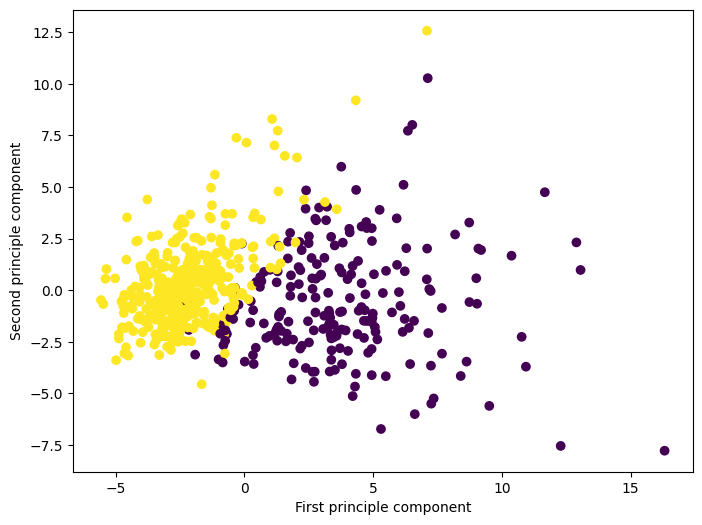

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()


In [ ]:
clf=LogisticRegression()
clf.fit(scaled_data,cancer['target'])
clf.score(scaled_data,cancer['target'])


0.9876977152899824

In [ ]:
clf.fit(x_pca,cancer['target'])
clf.score(x_pca,cancer['target'])

0.9560632688927944

## METRICES:

Metrics in scikit-learn are used to measure how well a machine learning model performs they help evaluate accuracy compare models,understand strengths and weaknesses and improve predictions in short metrics act like a “report card” for your model to see how good or bad it is.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
clf=KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [ ]:
clf.score(X_test_scaled,y_test)
# accuracy score

0.9473684210526315

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=clf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred)
#% of predictions that are correct means if accuracy score is 90% it predicts 90 times correct out of 100

0.9473684210526315

In [ ]:
precision_score(y_test,y_pred)
# Of all predicted positives, how many are actually positive means if model predicts 10 patients have cancer but actually 9 patients have cancer so models precison is 90%


0.9577464788732394

In [ ]:
recall_score(y_test,y_pred)
#  Of all the actual positive cases, how many did the model correctly predict, means if 12 patients have cancer but model predicts 8 that means recall precentage is 80%.

0.9577464788732394

In [ ]:
f1_score(y_test,y_pred)
# Balance between precision and recall

0.9577464788732394

Metrices for regression:

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X,y=fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
model.score(X_train_scaled,y_train)
# R2 score


0.6125511913966952

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)
# How much variance in target is explained by the model

0.575787706032451

In [ ]:
mean_absolute_error(y_test,y_pred)
# Measures the average absolute difference between predicted and actual values. means if the correct price is 110 but model predicr  price is 100 so error margin is 10 between
# actual and predicted price.


0.5332001304956566

In [ ]:
mean_squared_error(y_test,y_pred)
# Measures the average of squared differences between predicted and actual values


0.5558915986952442

## Cross-Validation:
Cross-validation in scikit-learn is a technique to evaluate how well your machine learning model will perform on unseen data.

It helps prevent problems like overfitting, where a model works well on training data but poorly on new data.


instead of doing train_test_split we can do cross-validation.we can split our data into folds and then we can train and test data on the folds we want


for example if folds are 1 2 3 4 5 and we can train on 1 23 4 and evaluate our model on 5th fold similarly we can train and test our model any fold we want.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
X,y=load_breast_cancer(return_X_y=True)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
model=KNeighborsClassifier()
scores=cross_val_score(model,X_scaled,y,cv=5)
scores





array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])

In [ ]:
import numpy as np
np.mean(scores)


np.float64(0.9648501785437045)